## Notebook 01: Data Profiling & Checks 

In [1]:
import pandas as pd
import numpy as np
from  pathlib import Path 

pq_path = Path("../data_processed/movies_clean.parquet")
df = pd.read_parquet(pq_path)

df.shape, df.head()

((4919, 29),
    color           director  num_critic_for_reviews  runtime_min  \
 0  Color      James Cameron                   723.0        178.0   
 1  Color     Gore Verbinski                   302.0        169.0   
 2  Color         Sam Mendes                   602.0        148.0   
 3  Color  Christopher Nolan                   813.0        164.0   
 4    nan        Doug Walker                     NaN          NaN   
 
    director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
 0                      0.0                   855.0  Joel David Moore   
 1                    563.0                  1000.0     Orlando Bloom   
 2                      0.0                   161.0      Rory Kinnear   
 3                  22000.0                 23000.0    Christian Bale   
 4                    131.0                     NaN        Rob Walker   
 
    actor_1_facebook_likes    gross_usd                           genres  ...  \
 0                  1000.0  760505847.0  Action|Ad

## Missing Value Summary
This table below shows the total number and percentage of missing values for each column, sorted most to least missing. 

In [ ]:
na_summary = (
    df.isna().sum()
        .to_frame("missing_count")
        .assign(missing_pct = lambda t: (t["missing_count"] / len(df)).round(3))
        .sort_values("missing_count", ascending = False)
)
na_summary

,missing_count,missing_pct
gross_usd,863,0.175
budget_usd,485,0.099
aspect_ratio,326,0.066
year,106,0.022
decade,106,0.022
director_facebook_likes,102,0.021
num_critic_for_reviews,49,0.010
actor_3_facebook_likes,23,0.005
num_user_for_reviews,21,0.004
runtime_min,15,0.003


### Descriptive Statistics (Numeric Columns)
This summary provides key statistics for all numeric fields, including count, mean, standard deviation, and distribution percentiles (25%, 50%, 75%). Values are formatted for easier readability, highlighting the sale of variables such as budget, revenue and user votes. 

In [3]:
desc = df.describe(include='number').T
display(
    desc.style.format({
        'mean': '{:,.2f}', 'std': '{:,.2f}',
        'min': '{:,.0f}',  '25%': '{:,.0f}', '50%': '{:,.0f}',
        '75%': '{:,.0f}',  'max': '{:,.0f}',
    })
)


,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4870.000000,138.01,120.25,1,49,108,191,813
runtime_min,4904.000000,107.09,25.28,7,93,103,118,511
director_facebook_likes,4817.000000,690.71,"2,832.11",0,7,48,190,"23,000"
actor_3_facebook_likes,4896.000000,630.96,"1,625.43",0,132,366,633,"23,000"
actor_1_facebook_likes,4912.000000,"6,490.88","15,103.08",0,607,982,"11,000","640,000"
gross_usd,4056.000000,"47,621,564.12","67,363,868.56",162,"5,008,728","25,035,665","61,099,406","760,505,847"
num_voted_users,4919.000000,"82,618.20","138,285.85",5,"8,356","33,158","93,758","1,689,764"
cast_total_facebook_likes,4919.000000,"9,574.65","18,159.99",0,"1,394","3,044","13,612","656,730"
facenumber_in_poster,4906.000000,1.38,2.02,0,0,1,2,43
num_user_for_reviews,4898.000000,267.60,372.84,1,64,154,320,"5,060"


### Exploratory Check: Movie Counts by Decade
Before moving into SQL queries, I performed an exploratory check to confirm the structure, distribution, and missing values of the dataset. A quick decade-based count confirms the data aligns with expectations, in addition to a large rise in production from the 1980's onward. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4919 entries, 0 to 4918
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4919 non-null   object 
 1   director                   4919 non-null   object 
 2   num_critic_for_reviews     4870 non-null   float64
 3   runtime_min                4904 non-null   float64
 4   director_facebook_likes    4817 non-null   float64
 5   actor_3_facebook_likes     4896 non-null   float64
 6   actor_2_name               4919 non-null   object 
 7   actor_1_facebook_likes     4912 non-null   float64
 8   gross_usd                  4056 non-null   float64
 9   genres                     4919 non-null   object 
 10  actor_1_name               4919 non-null   object 
 11  title                      4919 non-null   object 
 12  num_voted_users            4919 non-null   int64  
 13  cast_total_facebook_likes  4919 non-null   int64

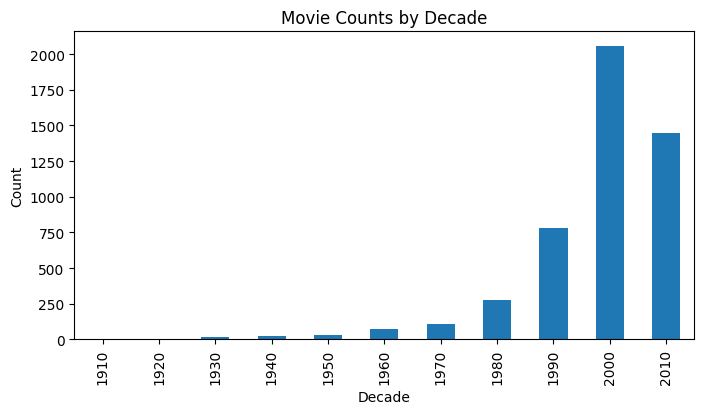

In [4]:

df.info()
df.isna().sum().sort_values(ascending = False).head(10)
df.describe(include = "all").transpose().head(15)

print("\nMissing values (top 10):")
print(df.isna().sum().sort_values(ascending = False).head(10))

print("\nDescriptive stats (first 15 rows):")
print(df.describe(include = "all").transpose().head(15))

import matplotlib.pyplot as plt 

df['decade'].value_counts().sort_index().plot(kind = "bar", figsize = (8, 4))
plt.title("Movie Counts by Decade")
plt.xlabel("Decade")
plt.ylabel("Count")
plt.show()

### Data Dictionary Overview
This table lists all dataset columns with their data type and percentage of missing values. It provides a quick reference for understanding variable structure and potential data quality issues before deeper analysis. 

In [5]:
data_dict = pd.DataFrame({
    "column": df.columns,
    "dtype": df.dtypes.astype(str).values,
    "pct_missing": [df[c].isna().mean() 
    for c in df.columns]
})
data_dict

,column,dtype,pct_missing
0,color,object,0.000000
1,director,object,0.000000
2,num_critic_for_reviews,float64,0.009961
3,runtime_min,float64,0.003049
4,director_facebook_likes,float64,0.020736
5,actor_3_facebook_likes,float64,0.004676
6,actor_2_name,object,0.000000
7,actor_1_facebook_likes,float64,0.001423
8,gross_usd,float64,0.175442
9,genres,object,0.000000
